In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [5]:
df = pd.read_excel("../data/Paul_etal_M74-4-1100.xlsx")

In [7]:
df = df[['depth_m', 'age_ka']]

In [9]:
df.to_csv("../out/time-depth-models/tdm_core_1100_d18O_conventional.csv", index=False)

In [10]:
tdms_1150 = list()
tdms_1100 = list()
for file in os.listdir("../out/time-depth-models/"):
    if file.startswith("tdm_core_1150") and "split_1" in file:
        tdms_1150.append(file)
    elif file.startswith("tdm_core_1100"):
        tdms_1100.append(file)

In [11]:
tdms_1100

['tdm_core_1100_d18O_conventional.csv', 'tdm_core_1100_d18O_LR04stack_dtw.csv']

In [12]:
tdms_1150

['tdm_core_1150_d18O_bulk_split_1_core_1100_conventional_agemodel_out.csv',
 'tdm_core_1150_d18O_split_1_core_1100_conventional_agemodel_out.csv',
 'tdm_core_1150_aragonite_split_1_core_1100_conventional_agemodel_out.csv',
 'tdm_core_1150_d18O_split_1_LR04stack_out.csv',
 'tdm_core_1150_d18O_bulk_split_1_LR04stack_out.csv',
 'tdm_core_1150_aragonite_split_1_LR04stack_out.csv']

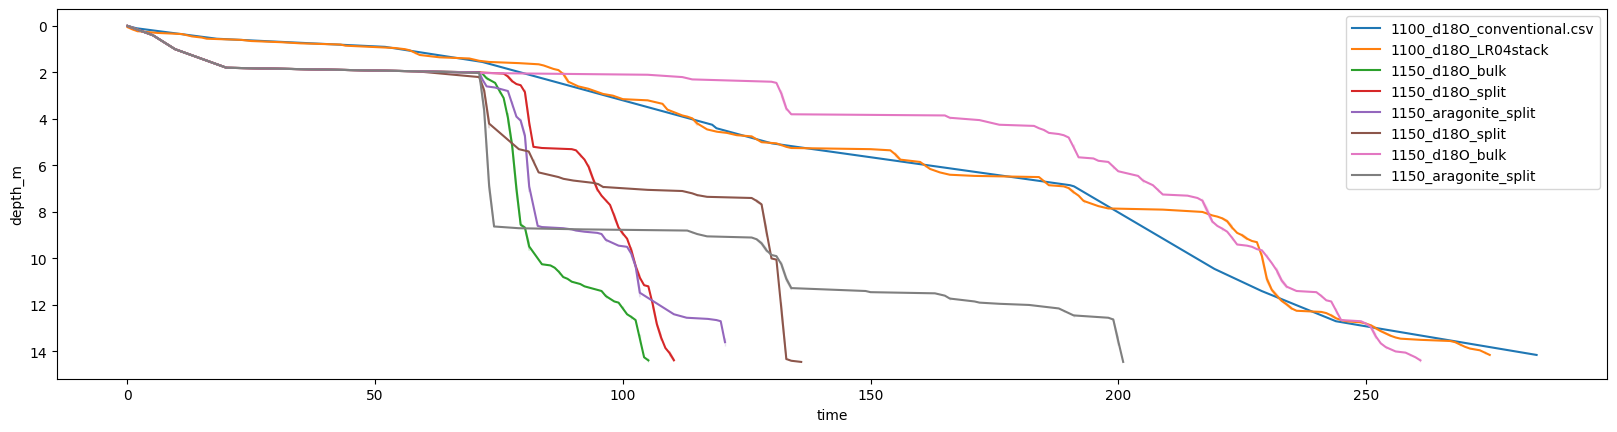

In [34]:
fig, ax = plt.subplots(1,1)
fig.set_figwidth(20)
for file in tdms_1100:
    label = file.split("tdm_core_1100_")[1]
    label = label.split("_")[:2]
    label = "_".join(label)
    df = pd.read_csv(f"../out/time-depth-models/{file}")
    sns.lineplot(ax=ax, x='time', y='depth_m', data=df, label=f"1100_{label}")
for file in tdms_1150:
    label = file.split("tdm_core_1150_")[1]
    label = label.split("_")[:2]
    label = "_".join(label)
    df = pd.read_csv(f"../out/time-depth-models/{file}")
    sns.lineplot(ax=ax, x='time', y='depth_m', data=df, label=f"1150_{label}")
ax.invert_yaxis()

In [36]:
fig.savefig("../out/figures/time-depth-models.svg")
fig.savefig("../out/figures/time-depth-models.eps")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
